#### Decision Tree Classification
Iris dataset

## Data  Ingestion


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
path = r"D:\ML\iris.xlsx"

In [4]:
df = pd.read_excel(path)

### Basic Data Quality Checks

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(1)

In [10]:
# Deop duplicate rows if any
df.drop_duplicates(inplace=True , 
keep='first' , 
ignore_index=True)

### Seperate X and Y

In [11]:

x = df.drop('species' , axis=1)
y = df['species']

## create pipeline
- in this data there is no categorical datad dont have need to seperate cat and num variable

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [13]:
num_pipeline = Pipeline(steps=[
    ('imputer' , SimpleImputer(strategy='median')),
    ('scaler' , StandardScaler())
])

In [14]:
num_pipeline

,steps,"[('imputer', ...), ('scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [15]:
x_scaled = num_pipeline.fit_transform(x)

In [16]:
x_scaled

array([[-0.8980334 ,  1.01240113, -1.33325507, -1.30862368],
       [-1.13956224, -0.1373532 , -1.33325507, -1.30862368],
       [-1.38109108,  0.32254853, -1.39001364, -1.30862368],
       [-1.5018555 ,  0.09259766, -1.2764965 , -1.30862368],
       [-1.01879782,  1.242352  , -1.33325507, -1.30862368],
       [-0.53574014,  1.9322046 , -1.16297935, -1.04548613],
       [-1.5018555 ,  0.78245027, -1.33325507, -1.17705491],
       [-1.01879782,  0.78245027, -1.2764965 , -1.30862368],
       [-1.74338434, -0.36730407, -1.33325507, -1.30862368],
       [-1.13956224,  0.09259766, -1.2764965 , -1.44019246],
       [-0.53574014,  1.47230287, -1.2764965 , -1.30862368],
       [-1.26032666,  0.78245027, -1.21973792, -1.30862368],
       [-1.26032666, -0.1373532 , -1.33325507, -1.44019246],
       [-1.86414876, -0.1373532 , -1.50353079, -1.44019246],
       [-0.05268246,  2.16215547, -1.44677222, -1.30862368],
       [-0.17344688,  3.08195894, -1.2764965 , -1.04548613],
       [-0.53574014,  1.

### Convert in dataframe

In [17]:
x_scaled = pd.DataFrame(x_scaled , columns=x.columns)

In [18]:
x_scaled

,sepal_length,sepal_width,petal_length,petal_width
0,-0.898033,1.012401,-1.333255,-1.308624
1,-1.139562,-0.137353,-1.333255,-1.308624
2,-1.381091,0.322549,-1.390014,-1.308624
3,-1.501855,0.092598,-1.276496,-1.308624
4,-1.018798,1.242352,-1.333255,-1.308624
...,...,...,...,...
144,1.034197,-0.137353,0.823571,1.454321
145,0.551140,-1.287108,0.710054,0.928046
146,0.792668,-0.137353,0.823571,1.059614
147,0.430375,0.782450,0.937088,1.454321


## Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x.shape

(149, 4)

In [21]:
x_train , x_test , y_train , y_test = train_test_split(
    x_scaled , y , test_size=0.15 , random_state=4 , stratify=y
)

In [22]:
print("x_train shape :" , y_train.shape)
print("x_test shape :" , y_test.shape)

x_train shape : (126,)
x_test shape : (23,)


In [23]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
102,1.517255,-0.137353,1.220881,1.191183
118,2.241842,-1.057157,1.788466,1.454321
144,1.034197,-0.137353,0.823571,1.454321
83,0.188846,-0.827206,0.766812,0.533339
22,-1.501855,1.242352,-1.560289,-1.308624


In [24]:
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
89,-0.414976,-1.287108,0.142468,0.138633
143,1.034197,0.552499,1.107364,1.717458
61,0.068082,-0.137353,0.255985,0.401770
40,-1.018798,1.012401,-1.390014,-1.177055
72,0.551140,-1.287108,0.653295,0.401770


In [25]:
y_train.head()

102     virginica
118     virginica
144     virginica
83     versicolor
22         setosa
Name: species, dtype: object

In [26]:
y_test.head()

89     versicolor
143     virginica
61     versicolor
40         setosa
72     versicolor
Name: species, dtype: object

## Fit the model

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
model = DecisionTreeClassifier(criterion='gini' , max_depth=3)

In [29]:
model.fit(x_train , y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [30]:
# Score the model
model.score(x_train , y_train)

0.9682539682539683

In [31]:
model.score(x_test , y_test)

1.0

### Evaluate model

In [32]:
from sklearn.metrics import classification_report  , confusion_matrix ,  ConfusionMatrixDisplay


In [33]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

In [34]:
train_pred

array(['virginica', 'virginica', 'virginica', 'virginica', 'setosa',
       'setosa', 'setosa', 'versicolor', 'setosa', 'setosa', 'setosa',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'virginica', 'setosa', 'versicolor',
       'virginica', 'setosa', 'virginica', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'setosa', 'setosa', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versic

In [35]:
print(classification_report(y_train , train_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        42
  versicolor       0.97      0.93      0.95        42
   virginica       0.93      0.98      0.95        42

    accuracy                           0.97       126
   macro avg       0.97      0.97      0.97       126
weighted avg       0.97      0.97      0.97       126



In [36]:
cf = confusion_matrix(y_train , train_pred)

In [37]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<Axes: >

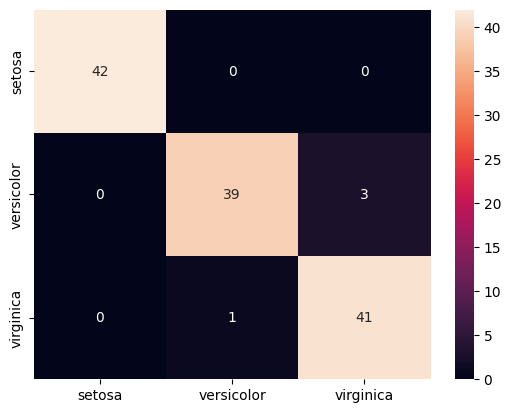

In [38]:
sns.heatmap(cf , xticklabels= ['setosa', 'versicolor', 'virginica']  , yticklabels= ['setosa', 'versicolor', 'virginica']  , annot=True , fmt='d' )

### Model performance on testing data

In [39]:
test_pred = model.predict(x_test)

In [40]:
test_pred

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'setosa', 'virginica',
       'setosa', 'setosa', 'virginica', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa'], dtype=object)

In [41]:
print(classification_report(y_test , test_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      1.00      1.00         8
   virginica       1.00      1.00      1.00         7

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



In [42]:
cf_test = confusion_matrix(y_test , test_pred)

<Axes: >

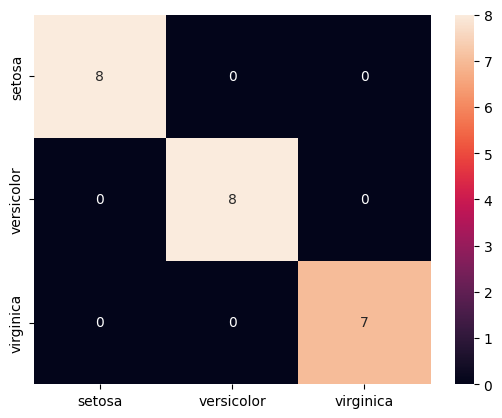

In [43]:
sns.heatmap(cf_test , xticklabels= ['setosa', 'versicolor', 'virginica']  , yticklabels= ['setosa', 'versicolor', 'virginica']  , annot=True , fmt='d' )

### Check cross validation score

In [44]:
from sklearn.model_selection import cross_val_score
DT = DecisionTreeClassifier(criterion='gini' , max_depth=3)
cvs = cross_val_score(estimator=DT , cv=5 , n_jobs=-1, 
                      X = x_train , 
                      y = y_train)

In [45]:
cvs

array([0.96153846, 0.96      , 0.84      , 0.92      , 0.96      ])

In [46]:
cvs.mean()

np.float64(0.9283076923076923)

## Hyperparameter tunning technique
- Hyperparameter :- those parameter which we can change and which are not part of data

- Tunning :- Changeing
- Grid search cv
- Randomized search cv

In [47]:
from sklearn.model_selection import GridSearchCV
parameter = {
    'criterion' : ['gini' , 'entropy'],
    'max_depth' : range(2,5),
}

model = DecisionTreeClassifier()

In [48]:
grid_csv = GridSearchCV(estimator= model ,
                        param_grid=parameter,
                        cv=5,
                        verbose= 1 ,
                        n_jobs=-1
                        )

In [49]:
grid_csv.fit(x_train , y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': range(2, 5)}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [50]:
grid_csv.best_params_

{'criterion': 'entropy', 'max_depth': 4}